In [1]:
import pandas as pd
import os
import numpy as np
from pandas import read_csv
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [2]:
scenario_name = 'BayArea'
out_scenario_name = 'BayArea'
file_path = '/Users/xiaodanxu/Documents/SynthFirm.nosync'
parameter_dir = 'SynthFirm_parameters'
input_dir = 'inputs_' + scenario_name
output_dir = 'outputs_' + out_scenario_name

us_ton_to_ton = 0.907185
miles_to_km = 1.60934

# define output file
export_with_firm_file = 'calibrated_export_OD_with_seller.csv'
import_with_firm_file = 'calibrated_import_OD_with_buyer.csv'

import_file = 'import_od.csv'
export_file = 'export_od.csv'

faf_name_lookup_file = 'FAF_NAME_LOOKUP.csv'
SCTG_name_file = 'SCTG_Groups_revised.csv'
zonal_id_file = 'zonal_id_lookup_final.csv'

int_out_dir = os.path.join(file_path, output_dir, 'international')
path_to_plot = 'plots_' + scenario_name

export_truck_shipment = \
read_csv(os.path.join(int_out_dir, export_with_firm_file))
import_truck_shipment = \
read_csv(os.path.join(int_out_dir, import_with_firm_file))

import_shipment_value = \
read_csv(os.path.join(file_path, output_dir, import_file))
export_shipment_value = \
read_csv(os.path.join(file_path, output_dir, export_file))
print(import_shipment_value.value_2017.sum())
faf_name_lookup = \
    read_csv(os.path.join(file_path, parameter_dir, faf_name_lookup_file))
sctg_name_lookup = \
    read_csv(os.path.join(file_path, parameter_dir, SCTG_name_file))

zonal_id_lookup = \
    read_csv(os.path.join(file_path, input_dir, zonal_id_file))
sctg_name_lookup = sctg_name_lookup[['SCTG_Code', 'Description']]
zonal_id_lookup = zonal_id_lookup[['MESOZONE', 'FAFNAME']]

70718.33863142322


In [3]:
# load data for validation
regional_import_file = 'port/FAF_regional_import.csv'
regional_export_file = 'port/FAF_regional_export.csv'
port_level_import_file = 'port/port_level_import.csv'
port_level_export_file = 'port/port_level_export.csv'

regional_import = read_csv(os.path.join(file_path, input_dir, regional_import_file))
regional_export = read_csv(os.path.join(file_path, input_dir, regional_export_file))
port_level_import = read_csv(os.path.join(file_path, input_dir, port_level_import_file))
port_level_export = read_csv(os.path.join(file_path, input_dir, port_level_export_file))
regional_import.head(5)

,fr_orig,dms_orig,dms_dest,fr_dest,fr_inmode,dms_mode,fr_outmode,sctg2,trade_type,dist_band,tons_2017,value_2017,tmiles_2017,CFS_CODE,CFS_NAME,distance,mode_def
0,801,64,61,NaN,4.0,4,NaN,1,2,3,0.002632,0.184282,0.000885,C,Canada,336.246201,Air
1,801,64,62,NaN,4.0,1,NaN,1,2,2,0.000297,0.020801,0.000035,C,Canada,117.845118,Truck
2,801,64,63,NaN,4.0,4,NaN,1,2,3,0.000511,0.035816,0.000219,C,Canada,428.571429,Air
3,801,64,64,NaN,4.0,1,NaN,1,2,1,0.002476,0.173404,0.000112,C,Canada,45.234249,Truck
4,801,64,65,NaN,4.0,1,NaN,1,2,2,0.000087,0.006119,0.000014,C,Canada,160.919540,Truck


In [4]:
# add variables
faf_name_lookup['FAF'] = faf_name_lookup['FAF'].astype(int)
export_truck_shipment = pd.merge(export_truck_shipment, 
                                 faf_name_lookup, on = 'FAF', how = 'left')
export_truck_shipment = pd.merge(export_truck_shipment, 
                                 zonal_id_lookup, 
                                 left_on = 'SellerZone', 
                                 right_on = 'MESOZONE', how = 'left')
export_truck_shipment.loc[:, 'total_load'] = \
export_truck_shipment.loc[:, 'TruckLoad'] * \
export_truck_shipment.loc[:, 'shipments'] / 1000 * us_ton_to_ton # in 1000 metric tons
print('Total export truck load:')
print(export_truck_shipment.loc[:, 'total_load'].sum())
export_truck_shipment.loc[:, 'Distance'] *= miles_to_km # in km

import_truck_shipment = pd.merge(import_truck_shipment, 
                                 faf_name_lookup, on = 'FAF', how = 'left')
import_truck_shipment = pd.merge(import_truck_shipment, 
                                 zonal_id_lookup, 
                                 left_on = 'BuyerZone', 
                                 right_on = 'MESOZONE', how = 'left')
import_truck_shipment.loc[:, 'total_load'] = \
import_truck_shipment.loc[:, 'TruckLoad'] * \
import_truck_shipment.loc[:, 'shipments'] / 1000 * us_ton_to_ton # in 1000 metric tons
print('Total import truck load:')
print(import_truck_shipment.loc[:, 'total_load'].sum())
import_truck_shipment.loc[:, 'Distance'] *= miles_to_km  # in km

import_shipment_value = pd.merge(import_shipment_value, 
                                 faf_name_lookup, on = 'FAF', how = 'left')
import_shipment_value.loc[:, 'total_load'] =  \
import_shipment_value.loc[:, 'TruckLoad'] * \
import_shipment_value.loc[:, 'ship_count'] / 1000 * us_ton_to_ton # in 1000 metric tons

print('Total import load:')
print(import_shipment_value.loc[:, 'total_load'].sum())
export_shipment_value = pd.merge(export_shipment_value, 
                                 faf_name_lookup, on = 'FAF', how = 'left')
export_shipment_value.loc[:, 'total_load'] =  \
export_shipment_value.loc[:, 'TruckLoad'] * \
export_shipment_value.loc[:, 'ship_count'] / 1000 * us_ton_to_ton # in 1000 metric tons

import_shipment_value = pd.merge(import_shipment_value, 
                                 sctg_name_lookup, on = 'SCTG_Code', how = 'left')

export_shipment_value = pd.merge(export_shipment_value, 
                                 sctg_name_lookup, on = 'SCTG_Code', how = 'left')

print('Total export load:')
print(export_shipment_value.loc[:, 'total_load'].sum())

Total export truck load:
13165.839889232222
Total import truck load:
12338.012355477978
Total import load:
17105.380309663877
Total export load:
19601.357463628134


In [5]:
export_truck_shipment = pd.merge(export_truck_shipment, 
                                 sctg_name_lookup, 
                                 left_on = 'Commodity_SCTG',
                                 right_on = 'SCTG_Code', how = 'left')

import_truck_shipment = pd.merge(import_truck_shipment, 
                                 sctg_name_lookup, 
                                 left_on = 'Commodity_SCTG',
                                 right_on = 'SCTG_Code', how = 'left')

import_truck_shipment.head(5)

,CFS_CODE,CFS_NAME,dms_dest,Commodity_SCTG,TruckLoad,SCTG_Group,mode_choice,shipments,Distance,bundle_id,...,CBPZONE,PORTZONE,TYPE,is_airport,SHORTNAME,MESOZONE,FAFNAME,total_load,SCTG_Code,Description
0,A,Asia & Oceania,11,20,6.022061,2,For-hire Truck,3.0,4326.549656,425530,...,6001,1044.0,Port,0,San Francisco,20001,Birmingham,0.016389,20,Basic Chemicals
1,A,Asia & Oceania,11,24,1.091752,4,For-hire Truck,4.0,4326.549656,425531,...,6001,1044.0,Port,0,San Francisco,20001,Birmingham,0.003962,24,Plastics and Rubber
2,A,Asia & Oceania,11,30,2.056409,4,For-hire Truck,2.0,4326.549656,425532,...,6001,1044.0,Port,0,San Francisco,20001,Birmingham,0.003731,30,"Textiles, Leather, and Articles of Textiles or..."
3,A,Asia & Oceania,11,31,1.439099,4,For-hire Truck,2.0,4326.549656,425533,...,6001,1044.0,Port,0,San Francisco,20001,Birmingham,0.002611,31,Non-Metallic Mineral Products
4,A,Asia & Oceania,11,33,0.417869,4,For-hire Truck,57.0,4326.549656,496256,...,6001,1044.0,Port,0,San Francisco,20001,Birmingham,0.021608,33,Articles of Base Metal


In [6]:
#summarize FAF results
mode_lookup = {1: 'Truck', 2: 'Rail', 3: 'Other', 4: 'Air', 
               5: 'Parcel', 6: 'Other', 7: 'Other', 8: 'Other'}

regional_export.loc[:, 'mode_def'] = regional_export.loc[:, 'dms_mode'].map(mode_lookup)

regional_export = \
regional_export.loc[regional_export['mode_def'] != 'Other']

regional_import.loc[:, 'mode_def'] = regional_import.loc[:, 'dms_mode'].map(mode_lookup)

regional_import = \
regional_import.loc[regional_import['mode_def'] != 'Other']
regional_export.head(5)


,fr_orig,dms_orig,dms_dest,fr_dest,fr_inmode,dms_mode,fr_outmode,sctg2,trade_type,dist_band,tons_2017,value_2017,tmiles_2017,CFS_CODE,CFS_NAME,distance,mode_def
0,NaN,61,62,801.0,NaN,4,4.0,1,3,3,0.000113,0.008739,0.000042,C,Canada,371.681416,Air
1,NaN,61,64,801.0,NaN,4,4.0,1,3,3,0.011395,0.445171,0.003942,C,Canada,345.941202,Air
2,NaN,61,69,801.0,NaN,1,4.0,1,3,2,0.000000,0.000000,0.000000,C,Canada,NaN,Truck
3,NaN,62,64,801.0,NaN,1,4.0,1,3,2,0.001286,0.050249,0.000150,C,Canada,116.640747,Truck
4,NaN,63,62,801.0,NaN,4,4.0,1,3,3,0.000026,0.001989,0.000012,C,Canada,461.538462,Air


In [7]:
faf_export_by_zone_and_mode = \
regional_export.groupby(['dms_dest', 'mode_def'])[['tons_2017']].sum()
faf_export_by_zone_and_mode = faf_export_by_zone_and_mode.reset_index()
faf_export_by_zone_and_mode.loc[:, 'tons_2017'] *= us_ton_to_ton
faf_export_by_zone_and_mode = \
pd.pivot_table(faf_export_by_zone_and_mode, index = 'dms_dest',
               columns = 'mode_def', values = 'tons_2017', aggfunc = 'sum')
faf_export_by_zone_and_mode.loc[:, 'Total'] = \
faf_export_by_zone_and_mode.sum(axis = 1)
faf_export_by_zone_and_mode.loc['Total'] =\
faf_export_by_zone_and_mode.sum()
faf_export_by_zone_and_mode

mode_def,Air,Parcel,Rail,Truck,Total
dms_dest,,,,,
62,0.516382,0.002572,NaN,0.116459,0.635413
64,83.125744,3417.560756,1908.051321,15230.192628,20638.930449
65,0.001288,NaN,NaN,0.015946,0.017235
69,0.082413,3.458448,100.020333,84.364437,187.925632
Total,83.725828,3421.021775,2008.071654,15314.689471,20827.508729


In [8]:
faf_import_by_zone_and_mode = \
regional_import.groupby(['dms_orig', 'mode_def'])[['tons_2017']].sum()
faf_import_by_zone_and_mode = faf_import_by_zone_and_mode.reset_index()
faf_import_by_zone_and_mode.loc[:, 'tons_2017'] *= us_ton_to_ton
faf_import_by_zone_and_mode = \
pd.pivot_table(faf_import_by_zone_and_mode, index = 'dms_orig',
               columns = 'mode_def', values = 'tons_2017', aggfunc = 'sum')
faf_import_by_zone_and_mode.loc[:, 'Total'] = \
faf_import_by_zone_and_mode.sum(axis = 1)
faf_import_by_zone_and_mode.loc['Total'] =\
faf_import_by_zone_and_mode.sum()
faf_import_by_zone_and_mode

mode_def,Air,Parcel,Rail,Truck,Total
dms_orig,,,,,
62,0.682704,0.342502,NaN,0.412707,1.437913
64,95.961191,2870.315607,1811.646554,12872.477706,17650.401058
65,0.216285,NaN,NaN,2.205953,2.422237
69,0.263086,51.838261,12.080410,2.127718,66.309476
Total,97.123266,2922.496370,1823.726964,12877.224083,17720.570683


In [9]:
import_shipment_by_zm = \
import_shipment_value.groupby('FAF')['total_load'].sum()

print(import_shipment_by_zm.head(5))

export_shipment_by_zm = \
export_shipment_value.groupby('FAF')['total_load'].sum()

print(export_shipment_by_zm.head(5))

FAF
62        0.303342
64    17073.806395
65       31.185603
69        0.084970
Name: total_load, dtype: float64
FAF
62        5.410162
64    19581.338400
65        0.003726
69       14.605175
Name: total_load, dtype: float64


In [10]:
#truck only 
import_truck_by_zm = \
import_truck_shipment.groupby('FAF')['total_load'].sum()

print(import_truck_by_zm.head(5))

export_truck_by_zm = \
export_truck_shipment.groupby('FAF')['total_load'].sum()

print(export_truck_by_zm.head(5))

FAF
62        0.184091
64    12322.098177
65       15.648772
69        0.081315
Name: total_load, dtype: float64
FAF
62        0.959091
64    13154.717959
65        0.000210
69       10.162630
Name: total_load, dtype: float64


# Part 1 -- Describe total value at each port

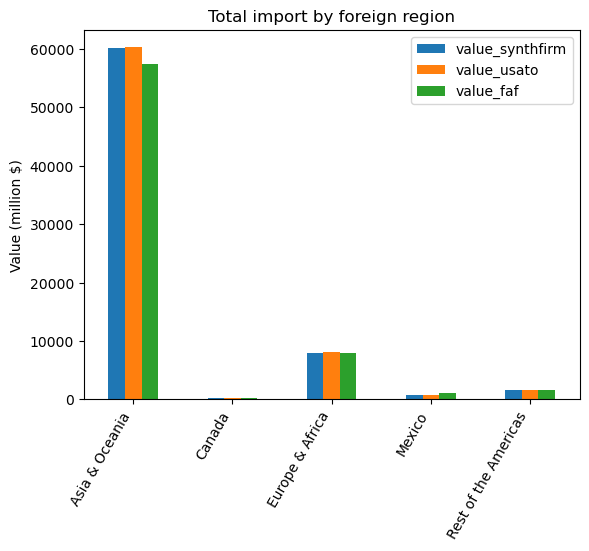

In [11]:
# region total
# Compare import by foreign region
usato_import_by_cfs = \
port_level_import.groupby('CFS_NAME')[['Customs Value (Gen) ($US)']].sum()
usato_import_by_cfs = usato_import_by_cfs.reset_index()

usato_import_by_cfs['Customs Value (Gen) ($US)'] /= 10 ** 6
usato_import_by_cfs.columns = ['CFS_NAME', 'value_usato']
faf_import_agg = \
regional_import.groupby('CFS_NAME')[['value_2017']].sum()
faf_import_agg = faf_import_agg.reset_index()
faf_import_agg.columns = ['CFS_NAME', 'value_faf']

modeled_import_by_cfs = \
import_shipment_value.groupby(['CFS_NAME'])[['value_2017']].sum()

modeled_import_by_cfs = modeled_import_by_cfs.reset_index()
modeled_import_by_cfs.columns = ['CFS_NAME', 'value_synthfirm']
import_value_compare = pd.merge(modeled_import_by_cfs,
                               usato_import_by_cfs, on = 'CFS_NAME',
                               how = 'left')

import_value_compare = pd.merge(import_value_compare,
                               faf_import_agg, on = 'CFS_NAME',
                               how = 'left')
# import_value_compare = import_value_compare.drop(columns = ['dms_orig'])
import_value_compare.plot(x = 'CFS_NAME', kind = 'bar')
plt.title('Total import by foreign region')
plt.ylabel('Value (million $)')
plt.xlabel('')
plt.xticks(rotation = 60, ha = 'right')
plt.savefig(os.path.join(file_path, path_to_plot, 'import_by_foreign_region.png'),
           dpi = 300, bbox_inches = 'tight')

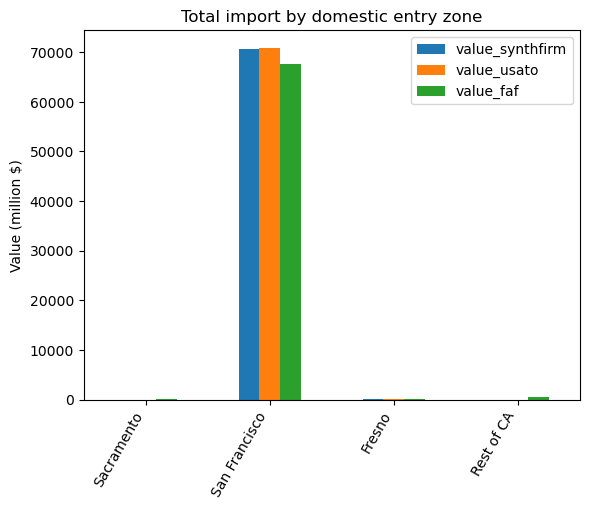

In [12]:
# Compare import by domestic entry
usato_import_by_faf = \
port_level_import.groupby('FAF')[['Customs Value (Gen) ($US)']].sum()
usato_import_by_faf = usato_import_by_faf.reset_index()

usato_import_by_faf['Customs Value (Gen) ($US)'] /= 10 ** 6
usato_import_by_faf.columns = ['dms_orig', 'value_usato']
faf_import_agg = \
regional_import.groupby('dms_orig')[['value_2017']].sum()
faf_import_agg = faf_import_agg.reset_index()
faf_import_agg.columns = ['dms_orig', 'value_faf']

modeled_import_by_faf = \
import_shipment_value.groupby(['FAF', 'SHORTNAME'])[['value_2017']].sum()

modeled_import_by_faf = modeled_import_by_faf.reset_index()
modeled_import_by_faf.columns = ['dms_orig', 'region_name', 'value_synthfirm']
import_value_compare = pd.merge(modeled_import_by_faf,
                               usato_import_by_faf, on = 'dms_orig',
                               how = 'left')

import_value_compare = pd.merge(import_value_compare,
                               faf_import_agg, on = 'dms_orig',
                               how = 'left')
import_value_compare = import_value_compare.drop(columns = ['dms_orig'])
import_value_compare.plot(x = 'region_name', kind = 'bar')
plt.title('Total import by domestic entry zone')
plt.ylabel('Value (million $)')
plt.xlabel('')
plt.xticks(rotation = 60, ha = 'right')
plt.savefig(os.path.join(file_path, path_to_plot, 'import_by_domestic_entry.png'),
           dpi = 300, bbox_inches = 'tight')

In [22]:
import_value_compare.sum()

TYPE               AirportCrossingPort
value_usato              100758.050062
value_synthfirm          100171.611797
load_synthfirm            49019.148381
dtype: object

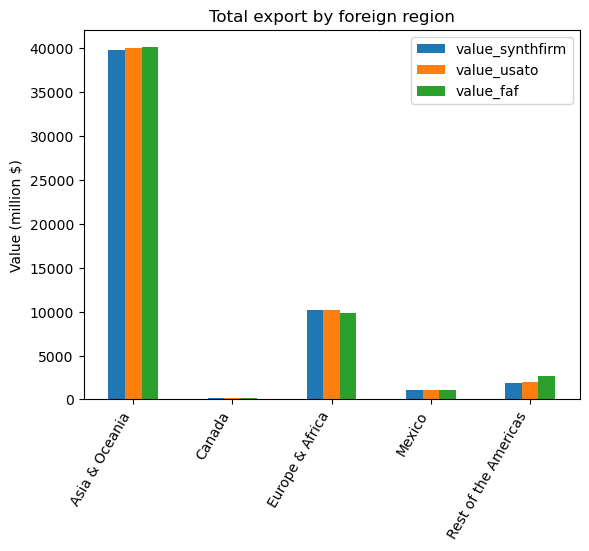

In [13]:
# Compare export by foreign region
usato_export_by_cfs = \
port_level_export.groupby('CFS_NAME')[['Total Exports Value ($US)']].sum()
usato_export_by_cfs = usato_export_by_cfs.reset_index()

usato_export_by_cfs['Total Exports Value ($US)'] /= 10 ** 6
usato_export_by_cfs.columns = ['CFS_NAME', 'value_usato']
faf_export_agg = \
regional_export.groupby('CFS_NAME')[['value_2017']].sum()
faf_export_agg = faf_export_agg.reset_index()
faf_export_agg.columns = ['CFS_NAME', 'value_faf']

modeled_export_by_cfs = \
export_shipment_value.groupby(['CFS_NAME'])[['value_2017']].sum()

modeled_export_by_cfs = modeled_export_by_cfs.reset_index()
modeled_export_by_cfs.columns = ['CFS_NAME', 'value_synthfirm']
export_value_compare = pd.merge(modeled_export_by_cfs,
                               usato_export_by_cfs, on = 'CFS_NAME',
                               how = 'left')

export_value_compare = pd.merge(export_value_compare,
                               faf_export_agg, on = 'CFS_NAME',
                               how = 'left')

export_value_compare.plot(x = 'CFS_NAME', kind = 'bar')
plt.title('Total export by foreign region')
plt.ylabel('Value (million $)')
plt.xlabel('')
plt.xticks(rotation = 60, ha = 'right')
plt.savefig(os.path.join(file_path, path_to_plot, 'export_by_foreign_region.png'),
           dpi = 300, bbox_inches = 'tight')

In [9]:
export_value_compare.sum()

CFS_NAME           Asia & OceaniaCanadaEurope & AfricaMexicoRest ...
value_synthfirm                                         92402.202512
value_usato                                             93865.988879
value_faf                                               96268.623201
dtype: object

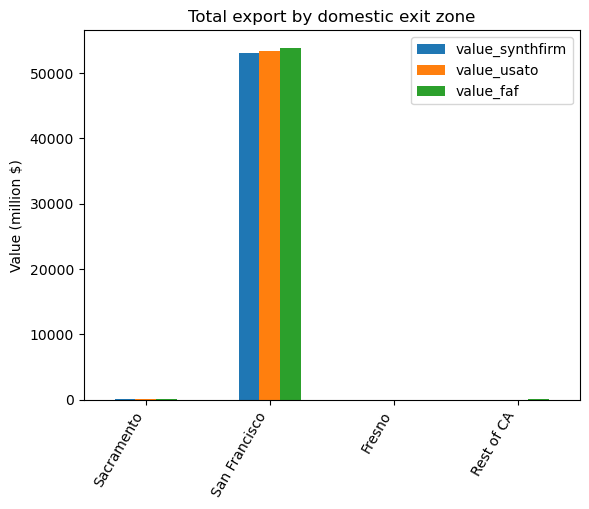

In [14]:
# Compare export by domestic exit
usato_export_by_faf = \
port_level_export.groupby('FAF')[['Total Exports Value ($US)']].sum()
usato_export_by_faf = usato_export_by_faf.reset_index()

usato_export_by_faf['Total Exports Value ($US)'] /= 10 ** 6
usato_export_by_faf.columns = ['dms_dest', 'value_usato']
faf_export_agg = \
regional_export.groupby('dms_dest')[['value_2017']].sum()
faf_export_agg = faf_export_agg.reset_index()
faf_export_agg.columns = ['dms_dest', 'value_faf']

modeled_export_by_faf = \
export_shipment_value.groupby(['FAF', 'SHORTNAME'])[['value_2017']].sum()

modeled_export_by_faf = modeled_export_by_faf.reset_index()
modeled_export_by_faf.columns = ['dms_dest', 'region_name', 'value_synthfirm']
export_value_compare = pd.merge(modeled_export_by_faf,
                               usato_export_by_faf, on = 'dms_dest',
                               how = 'left')

export_value_compare = pd.merge(export_value_compare,
                               faf_export_agg, on = 'dms_dest',
                               how = 'left')
export_value_compare = export_value_compare.drop(columns = ['dms_dest'])
export_value_compare.plot(x = 'region_name', kind = 'bar')
plt.title('Total export by domestic exit zone')
plt.ylabel('Value (million $)')
plt.xlabel('')
plt.xticks(rotation = 60, ha = 'right')
plt.savefig(os.path.join(file_path, path_to_plot, 'export_by_domestic_exit.png'),
           dpi = 300, bbox_inches = 'tight')

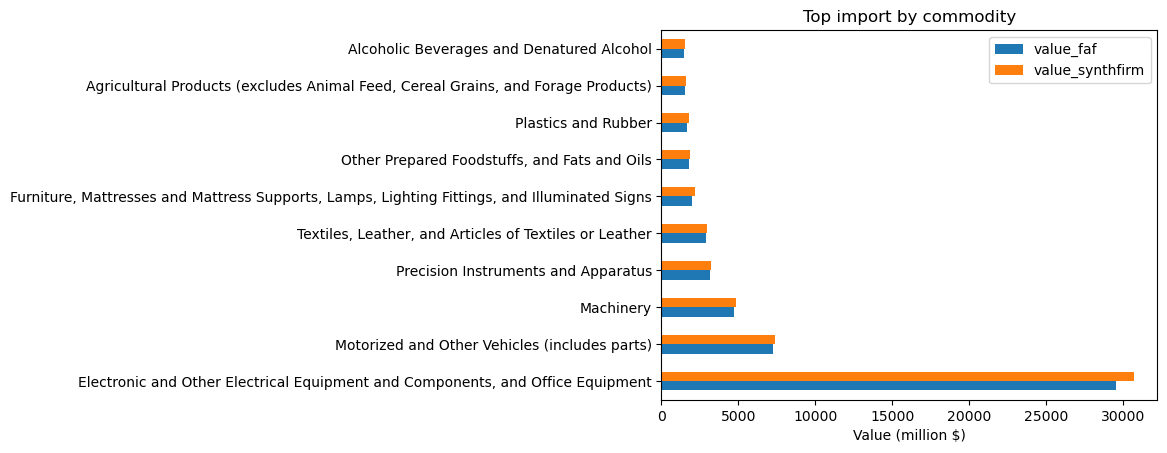

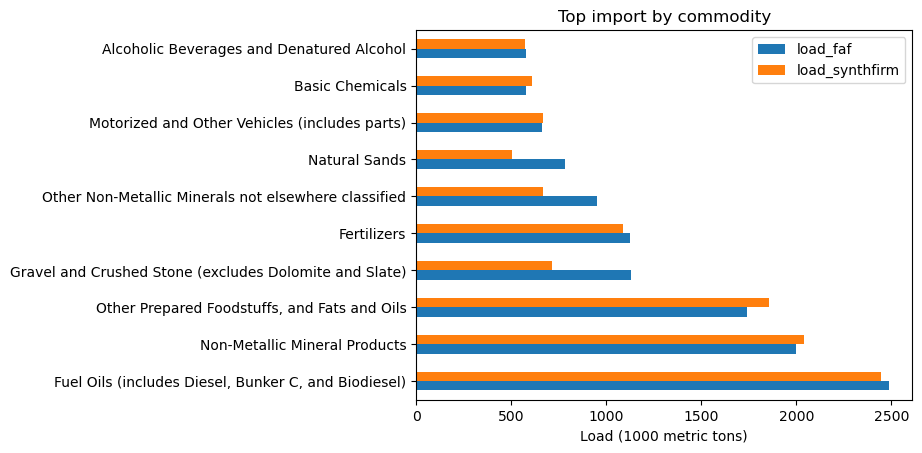

In [15]:
# top 10 import commodity by value and weight

faf_import_by_sctg = \
regional_import.groupby('sctg2')[['value_2017', 'tons_2017']].sum()
faf_import_by_sctg = faf_import_by_sctg.reset_index()
faf_import_by_sctg.loc[:, 'tons_2017'] *= us_ton_to_ton
faf_import_by_sctg.columns = ['SCTG_Code', 'value_faf', 'load_faf']

modeled_import_by_sctg = \
import_shipment_value.groupby(['SCTG_Code', 'Description'])[['value_2017',  'total_load']].sum()

modeled_import_by_sctg = modeled_import_by_sctg.reset_index()
modeled_import_by_sctg.columns = ['SCTG_Code', 'commodity', 
                                  'value_synthfirm', 'load_synthfirm']
import_value_compare = pd.merge(faf_import_by_sctg,
                               modeled_import_by_sctg, on = 'SCTG_Code',
                               how = 'left')
import_value_compare.dropna(inplace = True)
import_value_compare.drop(columns = ['SCTG_Code'], inplace = True)

# plot value
import_value_compare = \
import_value_compare.sort_values(by = 'value_faf', ascending = False)
import_value_to_plot = import_value_compare.head(10)
import_value_to_plot = \
import_value_to_plot[['commodity', 'value_faf', 'value_synthfirm']]
import_value_to_plot.plot(x = 'commodity', kind = 'barh')
plt.title('Top import by commodity')
plt.xlabel('Value (million $)')
plt.ylabel('')
# plt.xticks(rotation = 60, ha = 'right')
plt.savefig(os.path.join(file_path, path_to_plot, 'top_import_by_sctg_value.png'),
           dpi = 300, bbox_inches = 'tight')
plt.show()

# plot load
import_value_compare = \
import_value_compare.sort_values(by = 'load_faf', ascending = False)
import_load_to_plot = import_value_compare.head(10)
import_load_to_plot = \
import_load_to_plot[['commodity', 'load_faf', 'load_synthfirm']]
import_load_to_plot.plot(x = 'commodity', kind = 'barh')
plt.title('Top import by commodity')
plt.xlabel('Load (1000 metric tons)')
plt.ylabel('')
# plt.xticks(rotation = 60, ha = 'right')
plt.savefig(os.path.join(file_path, path_to_plot, 'top_import_by_sctg_load.png'),
           dpi = 300, bbox_inches = 'tight')
plt.show()

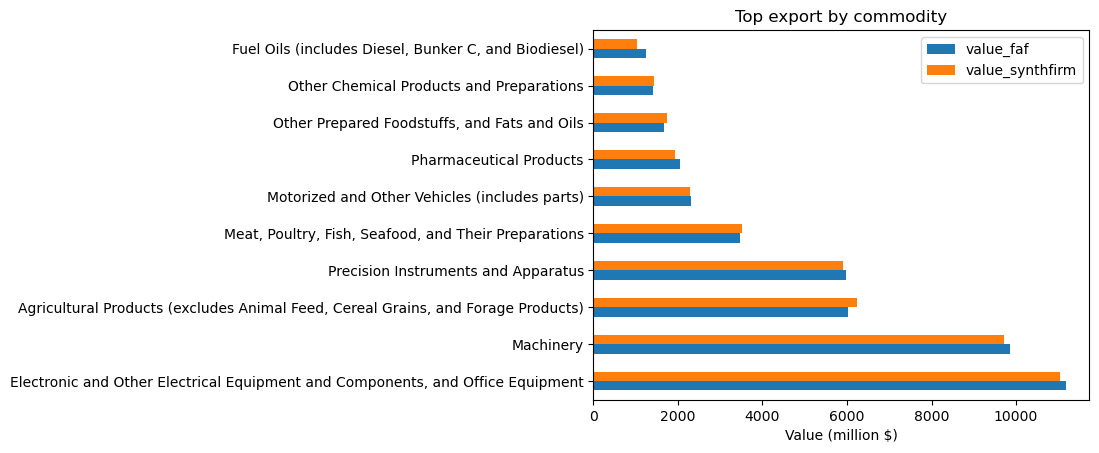

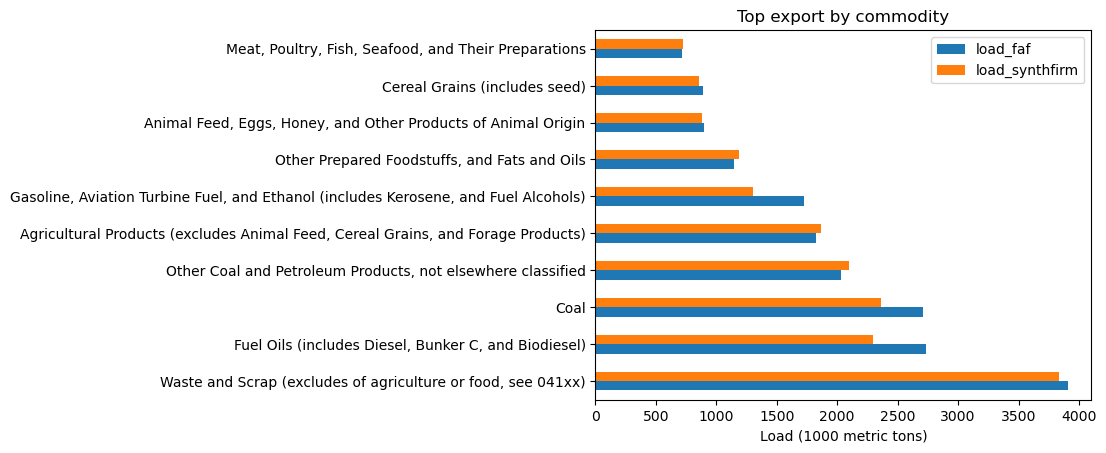

In [16]:
# top 10 export commodity by value and weight

faf_export_by_sctg = \
regional_export.groupby('sctg2')[['value_2017', 'tons_2017']].sum()
faf_export_by_sctg = faf_export_by_sctg.reset_index()
faf_export_by_sctg.loc[:, 'tons_2017'] *= us_ton_to_ton
faf_export_by_sctg.columns = ['SCTG_Code', 'value_faf', 'load_faf']

modeled_export_by_sctg = \
export_shipment_value.groupby(['SCTG_Code', 'Description'])[['value_2017',  'total_load']].sum()

modeled_export_by_sctg = modeled_export_by_sctg.reset_index()
modeled_export_by_sctg.columns = ['SCTG_Code', 'commodity', 
                                  'value_synthfirm', 'load_synthfirm']
export_value_compare = pd.merge(faf_export_by_sctg,
                               modeled_export_by_sctg, on = 'SCTG_Code',
                               how = 'left')

export_value_compare = export_value_compare.drop(columns = ['SCTG_Code'])

# plot value
export_value_compare = \
export_value_compare.sort_values(by = 'value_faf', ascending = False)
export_value_to_plot = export_value_compare.head(10)
export_value_to_plot = \
export_value_to_plot[['commodity', 'value_faf', 'value_synthfirm']]
export_value_to_plot.plot(x = 'commodity', kind = 'barh')
plt.title('Top export by commodity')
plt.xlabel('Value (million $)')
plt.ylabel('')
# plt.xticks(rotation = 60, ha = 'right')
plt.savefig(os.path.join(file_path, path_to_plot, 'top_export_by_sctg_value.png'),
           dpi = 300, bbox_inches = 'tight')
plt.show()

# plot load
export_value_compare = \
export_value_compare.sort_values(by = 'load_faf', ascending = False)
export_load_to_plot = export_value_compare.head(10)
export_load_to_plot = \
export_load_to_plot[['commodity', 'load_faf', 'load_synthfirm']]
export_load_to_plot.plot(x = 'commodity', kind = 'barh')
plt.title('Top export by commodity')
plt.xlabel('Load (1000 metric tons)')
plt.ylabel('')
# plt.xticks(rotation = 60, ha = 'right')
plt.savefig(os.path.join(file_path, path_to_plot, 'top_export_by_sctg_load.png'),
           dpi = 300, bbox_inches = 'tight')
plt.show()

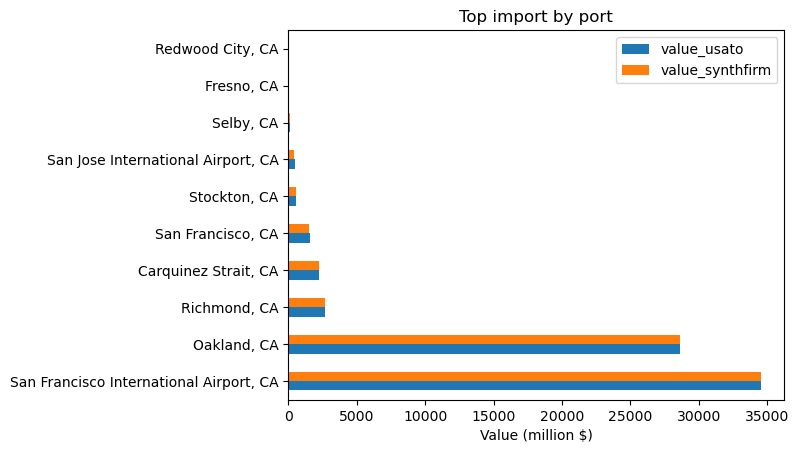

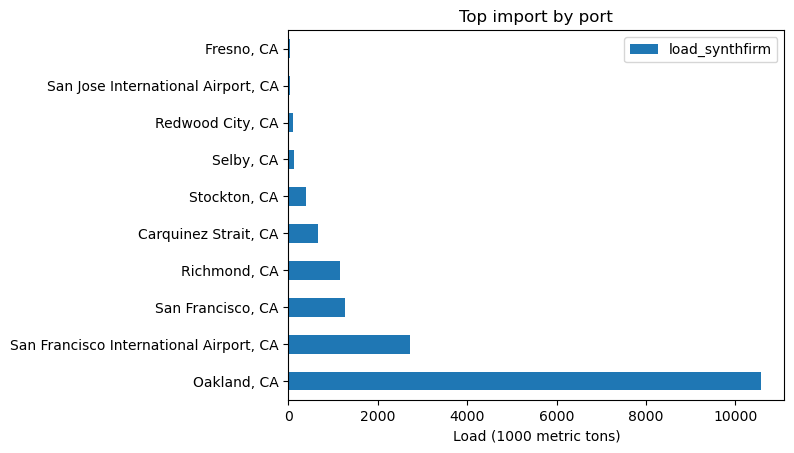

In [17]:
# top 10 import port by value and weight

usato_import_by_port = \
port_level_import.groupby('PORTID')[['Customs Value (Gen) ($US)']].sum()
usato_import_by_port = usato_import_by_port.reset_index()
usato_import_by_port['Customs Value (Gen) ($US)'] /= 10 ** 6 # convert to million
usato_import_by_port.columns = ['PORTID', 'value_usato']

modeled_import_by_port = \
import_shipment_value.groupby(['PORTID'])[['value_2017', 'total_load']].sum()

modeled_import_by_port = modeled_import_by_port.reset_index()
modeled_import_by_port.columns = ['PORTID', 
                                  'value_synthfirm', 'load_synthfirm']
import_value_compare = pd.merge(usato_import_by_port,
                               modeled_import_by_port, on = 'PORTID',
                               how = 'left')

# plot value
import_value_compare = \
import_value_compare.sort_values(by = 'value_usato', ascending = False)
import_value_to_plot = import_value_compare.head(10)
import_value_to_plot = \
import_value_to_plot[['PORTID', 'value_usato', 'value_synthfirm']]
import_value_to_plot.plot(x = 'PORTID', kind = 'barh')
plt.title('Top import by port')
plt.xlabel('Value (million $)')
plt.ylabel('')
# plt.xticks(rotation = 60, ha = 'right')
plt.savefig(os.path.join(file_path, path_to_plot, 'top_import_by_port_value.png'),
           dpi = 300, bbox_inches = 'tight')
plt.show()

# plot load
import_value_compare = \
import_value_compare.sort_values(by = 'load_synthfirm', ascending = False)
import_load_to_plot = import_value_compare.head(10)
import_load_to_plot = \
import_load_to_plot[['PORTID', 'load_synthfirm']]
import_load_to_plot.plot(x = 'PORTID', kind = 'barh')
plt.title('Top import by port')
plt.xlabel('Load (1000 metric tons)')
plt.ylabel('')
# plt.xticks(rotation = 60, ha = 'right')
plt.savefig(os.path.join(file_path, path_to_plot, 'top_import_by_port_load.png'),
           dpi = 300, bbox_inches = 'tight')
plt.show()

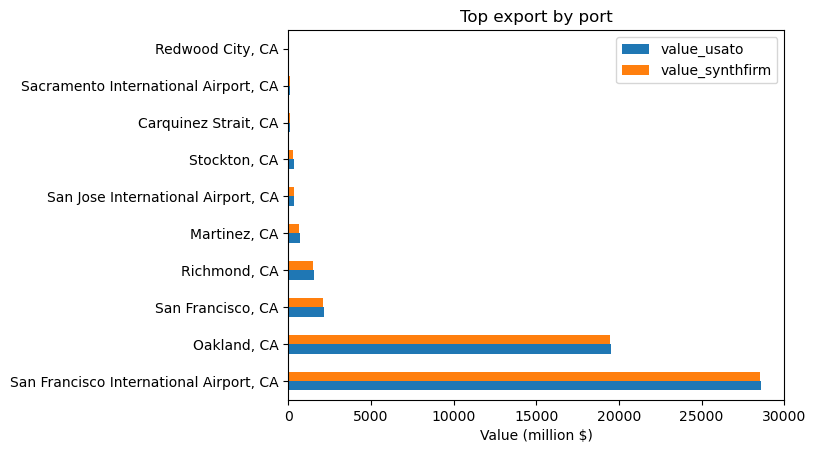

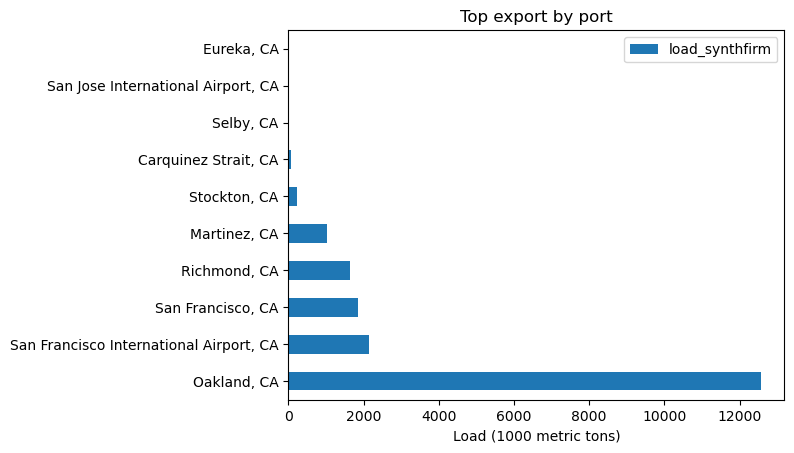

In [18]:
# top 10 export port by value and weight

usato_export_by_port = \
port_level_export.groupby('PORTID')[['Total Exports Value ($US)']].sum()
usato_export_by_port = usato_export_by_port.reset_index()
usato_export_by_port['Total Exports Value ($US)'] /= 10 ** 6 # convert to million
usato_export_by_port.columns = ['PORTID', 'value_usato']

modeled_export_by_port = \
export_shipment_value.groupby(['PORTID'])[['value_2017', 'total_load']].sum()

modeled_export_by_port = modeled_export_by_port.reset_index()
modeled_export_by_port.columns = ['PORTID', 
                                  'value_synthfirm', 'load_synthfirm']
export_value_compare = pd.merge(usato_export_by_port,
                               modeled_export_by_port, on = 'PORTID',
                               how = 'left')

# plot value
export_value_compare = \
export_value_compare.sort_values(by = 'value_usato', ascending = False)
export_value_to_plot = export_value_compare.head(10)
export_value_to_plot = \
export_value_to_plot[['PORTID', 'value_usato', 'value_synthfirm']]
export_value_to_plot.plot(x = 'PORTID', kind = 'barh')
plt.title('Top export by port')
plt.xlabel('Value (million $)')
plt.ylabel('')
# plt.xticks(rotation = 60, ha = 'right')
plt.savefig(os.path.join(file_path, path_to_plot, 'top_export_by_port_value.png'),
           dpi = 300, bbox_inches = 'tight')
plt.show()

# plot load
export_value_compare = \
export_value_compare.sort_values(by = 'load_synthfirm', ascending = False)
export_load_to_plot = export_value_compare.head(10)
export_load_to_plot = \
export_load_to_plot[['PORTID', 'load_synthfirm']]
export_load_to_plot.plot(x = 'PORTID', kind = 'barh')
plt.title('Top export by port')
plt.xlabel('Load (1000 metric tons)')
plt.ylabel('')
# plt.xticks(rotation = 60, ha = 'right')
plt.savefig(os.path.join(file_path, path_to_plot, 'top_export_by_port_load.png'),
           dpi = 300, bbox_inches = 'tight')
plt.show()

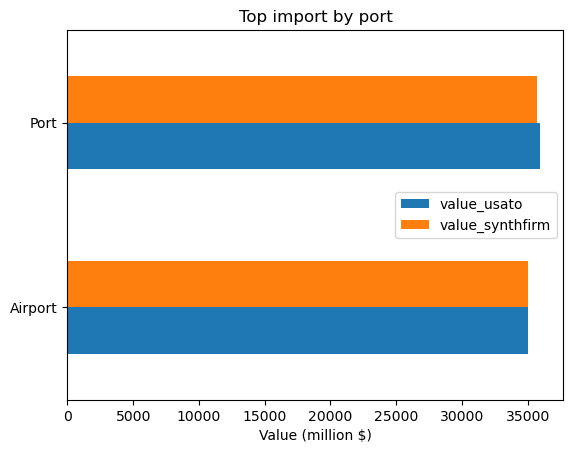

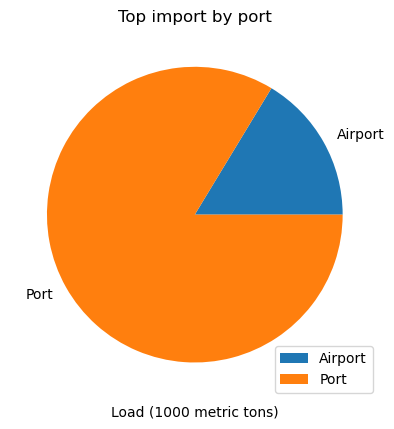

In [19]:
# total value and tonnage by type of entry

# Import plot

usato_import_by_port = \
port_level_import.groupby('TYPE')[['Customs Value (Gen) ($US)']].sum()
usato_import_by_port = usato_import_by_port.reset_index()
usato_import_by_port['Customs Value (Gen) ($US)'] /= 10 ** 6 # convert to million
usato_import_by_port.columns = ['TYPE', 'value_usato']

modeled_import_by_port = \
import_shipment_value.groupby(['TYPE'])[['value_2017', 'total_load']].sum()

modeled_import_by_port = modeled_import_by_port.reset_index()
modeled_import_by_port.columns = ['TYPE', 
                                  'value_synthfirm', 'load_synthfirm']
import_value_compare = pd.merge(usato_import_by_port,
                               modeled_import_by_port, on = 'TYPE',
                               how = 'left')

# plot value
# import_value_compare = \
# import_value_compare.sort_values(by = 'value_usato', ascending = False)
# import_value_to_plot = import_value_compare.head(10)
import_value_to_plot = \
import_value_compare[['TYPE', 'value_usato', 'value_synthfirm']]
import_value_to_plot.plot(x = 'TYPE', kind = 'barh')
plt.title('Top import by port')
plt.xlabel('Value (million $)')
plt.ylabel('')
# plt.xticks(rotation = 60, ha = 'right')
plt.savefig(os.path.join(file_path, path_to_plot, 'top_import_by_type_value.png'),
           dpi = 300, bbox_inches = 'tight')
plt.show()

# plot load
# import_value_compare = \
# import_value_compare.sort_values(by = 'load_synthfirm', ascending = False)
# import_load_to_plot = import_value_compare.head(10)
import_load_to_plot = \
import_value_compare[['TYPE', 'load_synthfirm']]
import_load_to_plot = import_load_to_plot.set_index('TYPE')
import_load_to_plot.plot(y = 'load_synthfirm', kind = 'pie')
plt.legend(loc = 4)
plt.title('Top import by port')
plt.xlabel('Load (1000 metric tons)')
plt.ylabel('')
# plt.xticks(rotation = 60, ha = 'right')
plt.savefig(os.path.join(file_path, path_to_plot, 'top_import_by_type_load.png'),
           dpi = 300, bbox_inches = 'tight')
plt.show()

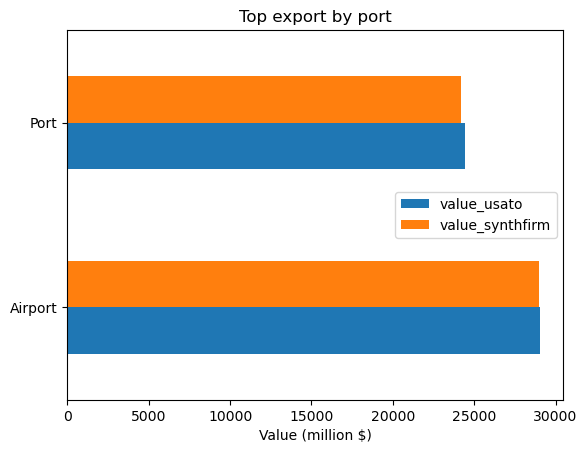

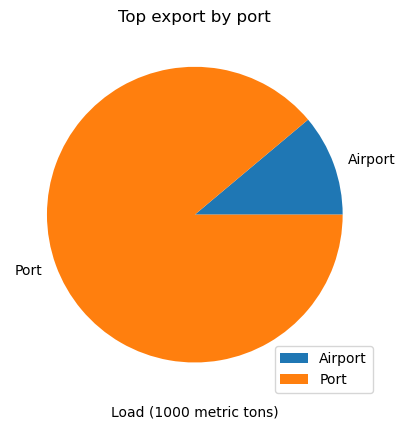

In [20]:
# Export
usato_export_by_port = \
port_level_export.groupby('TYPE')[['Total Exports Value ($US)']].sum()
usato_export_by_port = usato_export_by_port.reset_index()
usato_export_by_port['Total Exports Value ($US)'] /= 10 ** 6 # convert to million
usato_export_by_port.columns = ['TYPE', 'value_usato']

modeled_export_by_port = \
export_shipment_value.groupby(['TYPE'])[['value_2017', 'total_load']].sum()

modeled_export_by_port = modeled_export_by_port.reset_index()
modeled_export_by_port.columns = ['TYPE', 
                                  'value_synthfirm', 'load_synthfirm']
export_value_compare = pd.merge(usato_export_by_port,
                               modeled_export_by_port, on = 'TYPE',
                               how = 'left')

# plot value
# export_value_compare = \
# export_value_compare.sort_values(by = 'value_usato', ascending = False)
# export_value_to_plot = export_value_compare.head(10)
export_value_to_plot = \
export_value_compare[['TYPE', 'value_usato', 'value_synthfirm']]
export_value_to_plot.plot(x = 'TYPE', kind = 'barh')
plt.title('Top export by port')
plt.xlabel('Value (million $)')
plt.ylabel('')
# plt.xticks(rotation = 60, ha = 'right')
plt.savefig(os.path.join(file_path, path_to_plot, 'top_export_by_type_value.png'),
           dpi = 300, bbox_inches = 'tight')
plt.show()

# plot load
# export_value_compare = \
# export_value_compare.sort_values(by = 'load_synthfirm', ascending = False)
# export_load_to_plot = export_value_compare.head(10)
export_load_to_plot = \
export_value_compare[['TYPE', 'load_synthfirm']]
export_load_to_plot = export_load_to_plot.set_index('TYPE')
export_load_to_plot.plot(y = 'load_synthfirm', kind = 'pie')
plt.title('Top export by port')
plt.xlabel('Load (1000 metric tons)')
plt.legend(loc = 4)
plt.ylabel('')
# plt.xticks(rotation = 60, ha = 'right')
plt.savefig(os.path.join(file_path, path_to_plot, 'top_export_by_type_load.png'),
           dpi = 300, bbox_inches = 'tight')
plt.show()

# Part 2 -- OD characteristics of truck flow

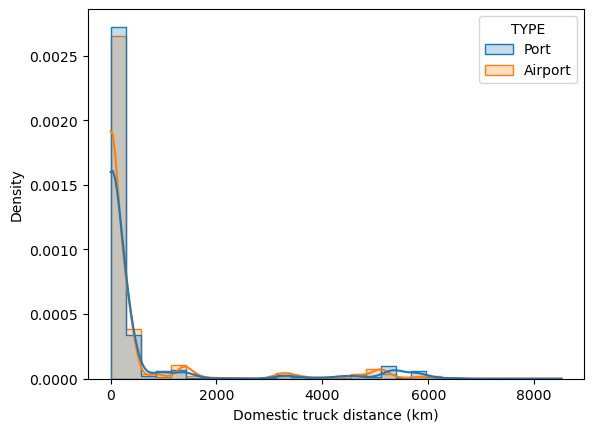

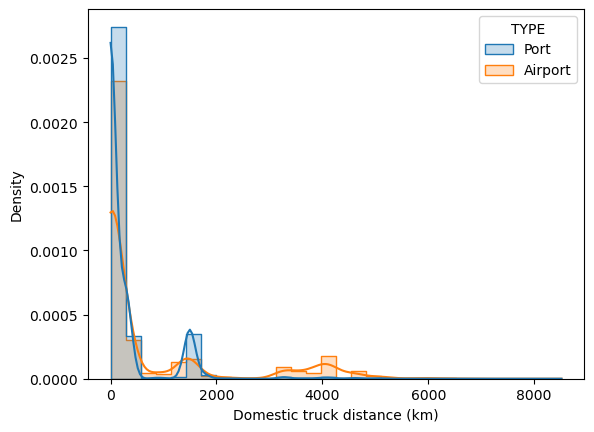

In [21]:
# plot shipment distance
sns.histplot(
   data=import_truck_shipment, x="Distance", hue="TYPE", weights = 'total_load',
   common_norm=False, kde=True, element="step", bins = 30, stat = 'density',
)
plt.xlabel('Domestic truck distance (km)')
plt.savefig(os.path.join(file_path, path_to_plot, 'import_by_type_dist.png'),
           dpi = 300, bbox_inches = 'tight')
plt.show()

sns.histplot(
   data=export_truck_shipment, x="Distance", hue="TYPE", weights = 'total_load',
   common_norm=False, kde=True, element="step", bins = 30, stat = 'density',
)
plt.xlabel('Domestic truck distance (km)')
plt.savefig(os.path.join(file_path, path_to_plot, 'export_by_type_dist.png'),
           dpi = 300, bbox_inches = 'tight')
plt.show()

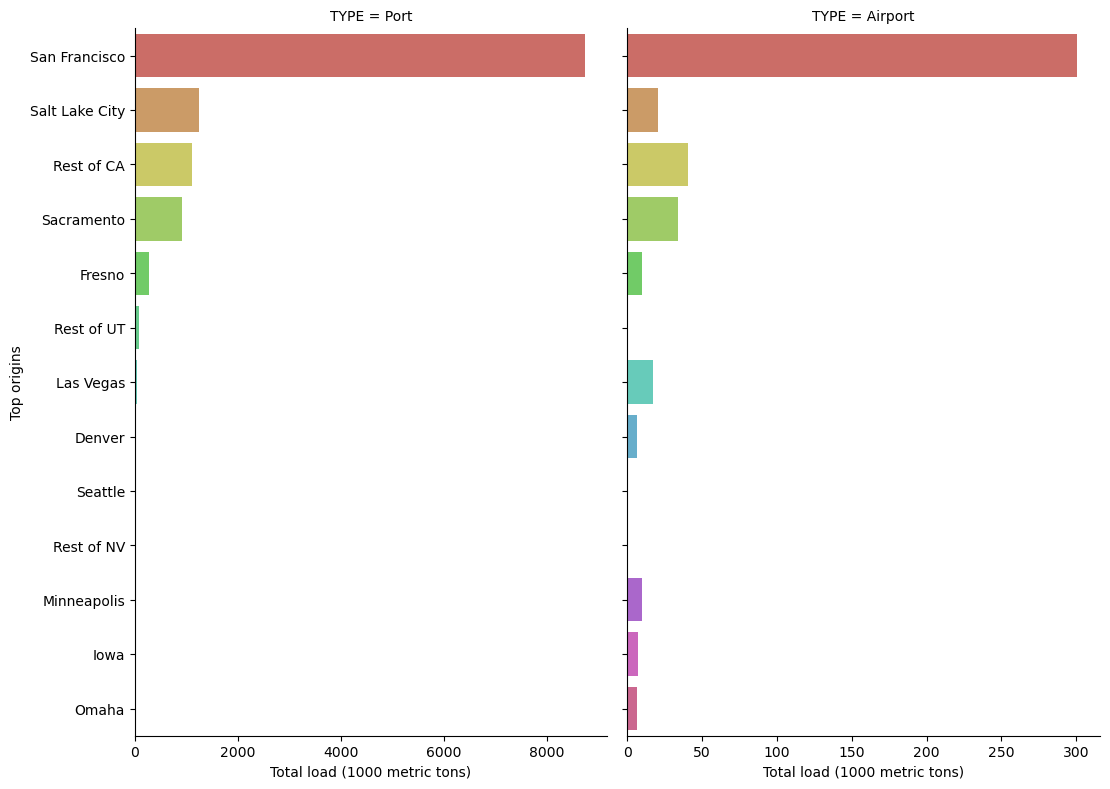

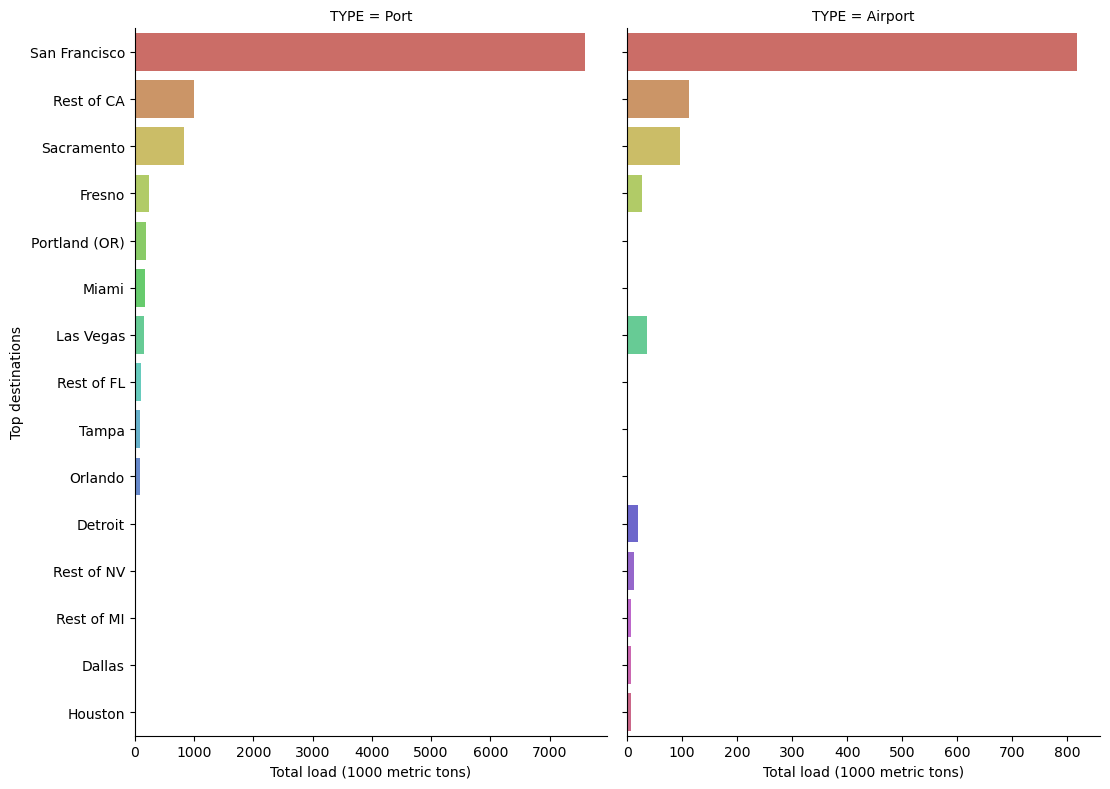

In [22]:
# top origin/destination
export_truck_origin = \
export_truck_shipment.groupby(['TYPE', 'FAFNAME'])[['total_load']].sum()
export_truck_origin = export_truck_origin.reset_index()
export_truck_origin = \
export_truck_origin.sort_values(by = 'total_load', ascending = False)

import_truck_dest = \
import_truck_shipment.groupby(['TYPE', 'FAFNAME'])[['total_load']].sum()
import_truck_dest = import_truck_dest.reset_index()
import_truck_dest = \
import_truck_dest.sort_values(by = 'total_load', ascending = False)

import_truck_dest.head(5)

export_truck_origin = export_truck_origin.groupby('TYPE').head(10)
export_truck_origin = export_truck_origin.reset_index()

ax = sns.catplot(kind = 'bar', data = export_truck_origin,
           y = 'FAFNAME', x = 'total_load', col = 'TYPE', sharex = False,
                 height=8, aspect = 0.7, palette = 'hls')
ax.set(ylabel ="Top origins")
ax.set(xlabel ="Total load (1000 metric tons)")
plt.savefig(os.path.join(file_path, path_to_plot, 'export_by_type_orig.png'),
           dpi = 300, bbox_inches = 'tight')
plt.show()
import_truck_dest = import_truck_dest.groupby('TYPE').head(10)
import_truck_dest = import_truck_dest.reset_index()

ax = sns.catplot(kind = 'bar', data = import_truck_dest,
           y = 'FAFNAME', x = 'total_load', col = 'TYPE', sharex = False,
                 height=8, aspect = 0.7, palette = 'hls')
ax.set(ylabel ="Top destinations")
ax.set(xlabel ="Total load (1000 metric tons)")
plt.savefig(os.path.join(file_path, path_to_plot, 'import_by_type_dest.png'),
           dpi = 300, bbox_inches = 'tight')
plt.show()

# Part 3 -- port of SF and OAK characteristics

In [25]:
# check results for SFO and OAK

port_list = ['Oakland, CA', 'San Francisco, CA']
sf_export_truck_shipment = \
export_truck_shipment.loc[export_truck_shipment['PORTID'].isin(port_list)]

sf_import_truck_shipment = \
import_truck_shipment.loc[import_truck_shipment['PORTID'].isin(port_list)]

sf_import_truck_shipment.head(5)

,CFS_CODE,CFS_NAME,dms_dest,Commodity_SCTG,TruckLoad,SCTG_Group,mode_choice,shipments,Distance,bundle_id,...,CBPZONE,PORTZONE,TYPE,is_airport,SHORTNAME,MESOZONE,FAFNAME,total_load,SCTG_Code,Description
0,A,Asia & Oceania,11,20,6.022061,2,For-hire Truck,3.0,4326.549656,425530,...,6001,1044.0,Port,0,San Francisco,20001,Birmingham,0.016389,20,Basic Chemicals
1,A,Asia & Oceania,11,24,1.091752,4,For-hire Truck,4.0,4326.549656,425531,...,6001,1044.0,Port,0,San Francisco,20001,Birmingham,0.003962,24,Plastics and Rubber
2,A,Asia & Oceania,11,30,2.056409,4,For-hire Truck,2.0,4326.549656,425532,...,6001,1044.0,Port,0,San Francisco,20001,Birmingham,0.003731,30,"Textiles, Leather, and Articles of Textiles or..."
3,A,Asia & Oceania,11,31,1.439099,4,For-hire Truck,2.0,4326.549656,425533,...,6001,1044.0,Port,0,San Francisco,20001,Birmingham,0.002611,31,Non-Metallic Mineral Products
4,A,Asia & Oceania,11,33,0.417869,4,For-hire Truck,57.0,4326.549656,496256,...,6001,1044.0,Port,0,San Francisco,20001,Birmingham,0.021608,33,Articles of Base Metal


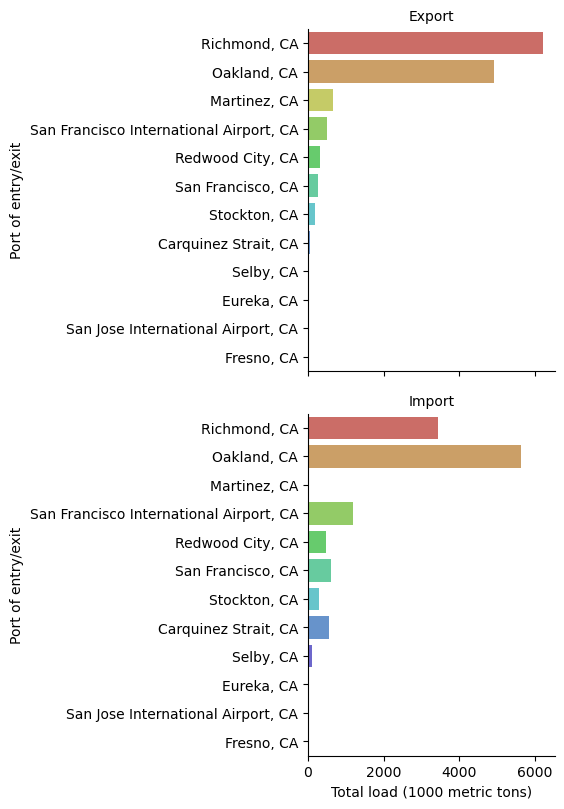

In [26]:
# total load
export_by_port = \
export_truck_shipment.groupby(['PORTID'])[['total_load']].sum()
export_by_port = export_by_port.reset_index()
export_by_port = \
export_by_port.sort_values(by = 'total_load', ascending = False)
export_by_port = export_by_port.head(10)
import_by_port = \
import_truck_shipment.groupby(['PORTID'])[['total_load']].sum()
import_by_port = import_by_port.reset_index()
import_by_port = \
import_by_port.sort_values(by = 'total_load', ascending = False)
import_by_port = import_by_port.head(10)

export_by_port.loc[:, 'Type'] = 'Export'
import_by_port.loc[:, 'Type'] = 'Import'

flow_by_port = pd.concat([export_by_port, import_by_port])


ax = sns.catplot( data = flow_by_port,
           y = 'PORTID', x = 'total_load', row = 'Type',
            palette = 'hls', kind = 'bar', height = 4, aspect = 0.8)
ax.set(ylabel ="Port of entry/exit")
ax.set(xlabel ="Total load (1000 metric tons)")
ax.set_titles("{row_name}")
plt.savefig(os.path.join(file_path, path_to_plot, 'regional_flow_by_port.png'),
           dpi = 300, bbox_inches = 'tight')
plt.show()

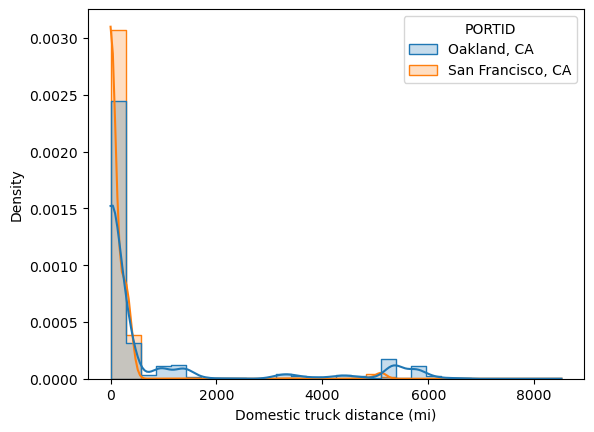

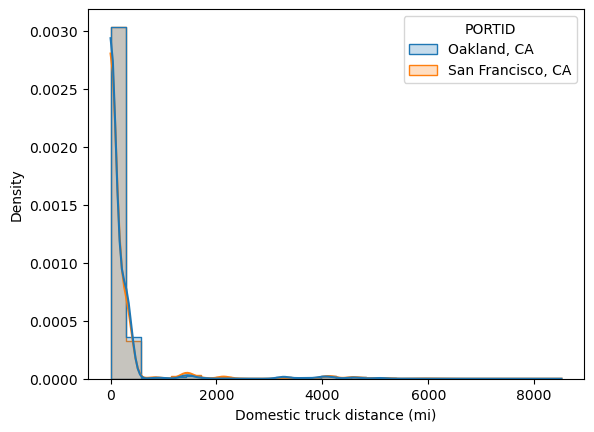

In [27]:
# plot shipment distance
sns.histplot(
   data=sf_import_truck_shipment, x="Distance", hue="PORTID", weights = 'total_load',
   common_norm=False, kde=True, element="step", bins = 30, stat = 'density',
)
plt.xlabel('Domestic truck distance (mi)')
plt.savefig(os.path.join(file_path, path_to_plot, 'import_by_port_dist.png'),
           dpi = 300, bbox_inches = 'tight')
plt.show()

sns.histplot(
   data=sf_export_truck_shipment, x="Distance", hue="PORTID", weights = 'total_load',
   common_norm=False, kde=True, element="step", bins = 30, stat = 'density',
)
plt.xlabel('Domestic truck distance (mi)')
plt.savefig(os.path.join(file_path, path_to_plot, 'export_by_port_dist.png'),
           dpi = 300, bbox_inches = 'tight')
plt.show()

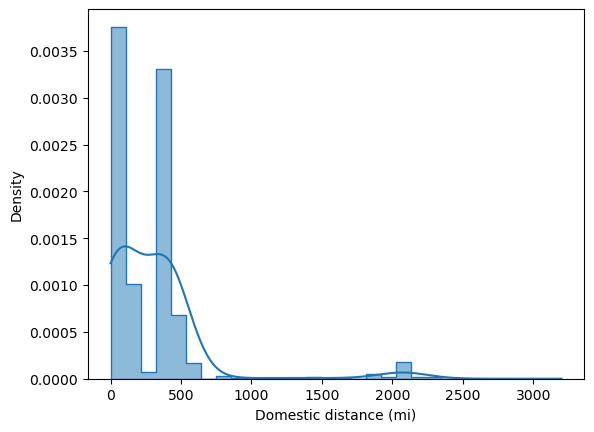

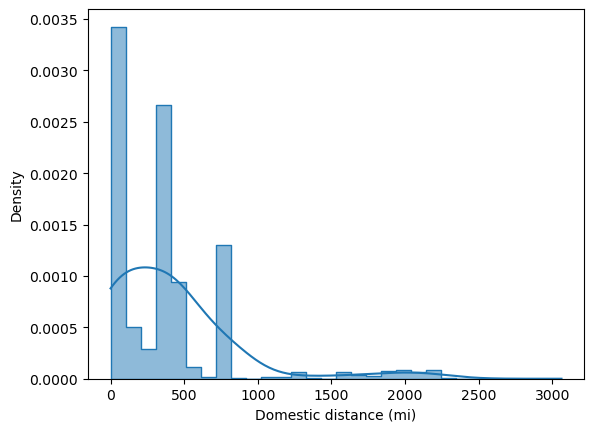

In [31]:
# plot reference shipment distance from faf
regional_import_truck = \
regional_import.loc[regional_import['mode_def'] == 'Truck']
sns.histplot(
   data=regional_import_truck, x="distance", weights = 'tons_2017',
   common_norm=False, kde=True, element="step", bins = 30, stat = 'density',
)
plt.xlabel('Domestic distance (mi)')
plt.savefig(os.path.join(file_path, path_to_plot, 'import_faf_dist.png'),
           dpi = 300, bbox_inches = 'tight')
plt.show()

regional_export_truck = \
regional_export.loc[regional_export['mode_def'] == 'Truck']
sns.histplot(
   data=regional_export_truck, x="distance", weights = 'tons_2017',
   common_norm=False, kde=True, element="step", bins = 30, stat = 'density',
)
plt.xlabel('Domestic distance (mi)')
plt.savefig(os.path.join(file_path, path_to_plot, 'export_faf_dist.png'),
           dpi = 300, bbox_inches = 'tight')
plt.show()

In [18]:
regional_import.columns

Index(['fr_orig', 'dms_orig', 'dms_dest', 'fr_dest', 'fr_inmode', 'dms_mode',
       'fr_outmode', 'sctg2', 'trade_type', 'dist_band', 'tons_2017',
       'value_2017', 'tmiles_2017', 'CFS_CODE', 'CFS_NAME', 'distance',
       'mode_def'],
      dtype='object')

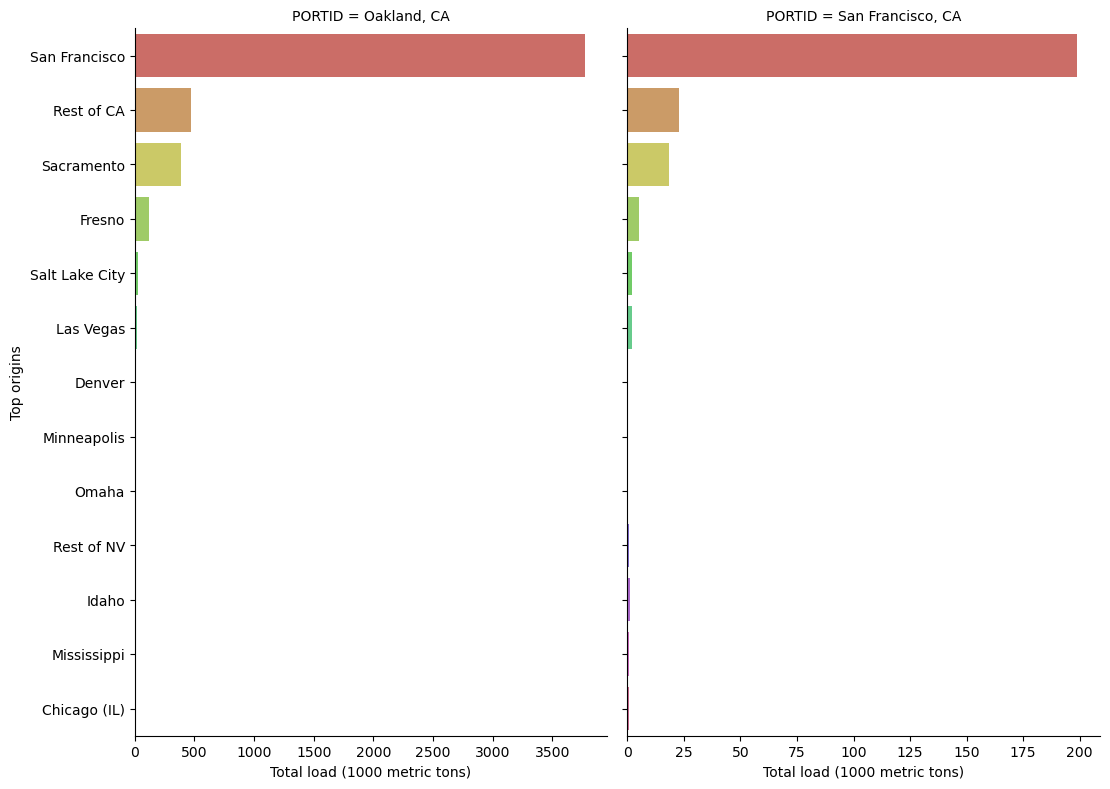

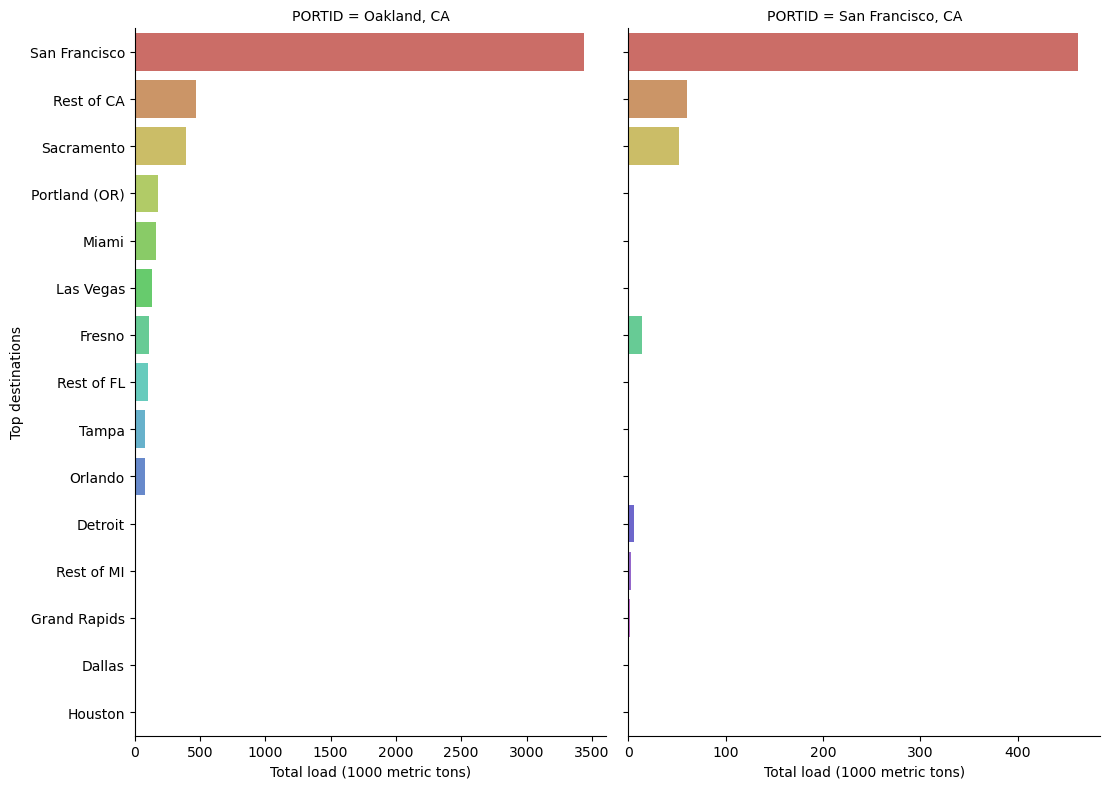

In [28]:
# top origin/destination
sf_export_truck_origin = \
sf_export_truck_shipment.groupby(['PORTID', 'FAFNAME'])[['total_load']].sum()
sf_export_truck_origin = sf_export_truck_origin.reset_index()
sf_export_truck_origin = \
sf_export_truck_origin.sort_values(by = 'total_load', ascending = False)

sf_import_truck_dest = \
sf_import_truck_shipment.groupby(['PORTID', 'FAFNAME'])[['total_load']].sum()
sf_import_truck_dest = sf_import_truck_dest.reset_index()
sf_import_truck_dest = \
sf_import_truck_dest.sort_values(by = 'total_load', ascending = False)

sf_import_truck_dest.head(5)

sf_export_truck_origin = sf_export_truck_origin.groupby('PORTID').head(10)
sf_export_truck_origin = sf_export_truck_origin.reset_index()

ax = sns.catplot(kind = 'bar', data = sf_export_truck_origin,
           y = 'FAFNAME', x = 'total_load', col = 'PORTID', sharex = False,
                 height=8, aspect = 0.7, palette = 'hls')
ax.set(ylabel ="Top origins")
ax.set(xlabel ="Total load (1000 metric tons)")
plt.savefig(os.path.join(file_path, path_to_plot, 'export_by_port_orig.png'),
           dpi = 300, bbox_inches = 'tight')
plt.show()
sf_import_truck_dest = sf_import_truck_dest.groupby('PORTID').head(10)
sf_import_truck_dest = sf_import_truck_dest.reset_index()

ax = sns.catplot(kind = 'bar', data = sf_import_truck_dest,
           y = 'FAFNAME', x = 'total_load', col = 'PORTID', sharex = False,
                 height=8, aspect = 0.7, palette = 'hls')
ax.set(ylabel ="Top destinations")
ax.set(xlabel ="Total load (1000 metric tons)")
plt.savefig(os.path.join(file_path, path_to_plot, 'import_by_port_dest.png'),
           dpi = 300, bbox_inches = 'tight')
plt.show()

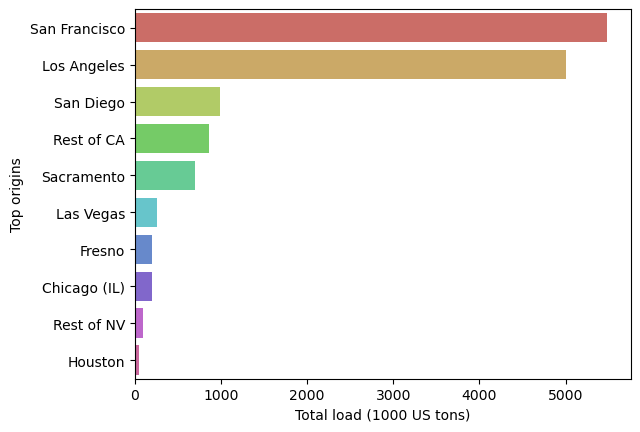

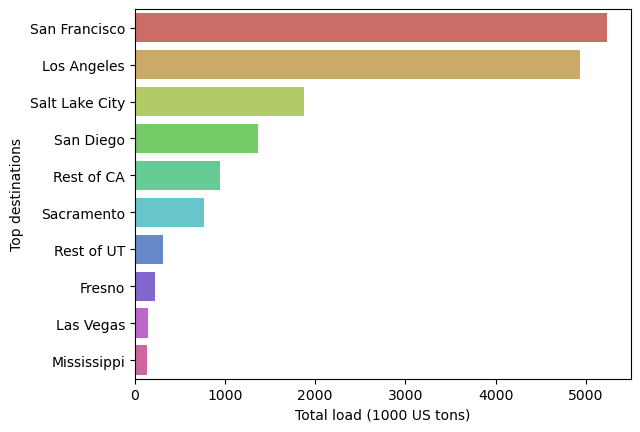

In [32]:
# plot reference faf top origin/destinations
faf_name_lookup['FAF'] = faf_name_lookup['FAF'].astype(int)
faf_export_truck_origin = \
regional_import_truck.groupby(['dms_dest'])[['tons_2017']].sum()
faf_export_truck_origin = faf_export_truck_origin.reset_index()
faf_export_truck_origin = pd.merge(faf_export_truck_origin, 
                                   faf_name_lookup,
                                   left_on = 'dms_dest', right_on = 'FAF',
                                   how = 'left')
faf_export_truck_origin = \
faf_export_truck_origin.sort_values(by = 'tons_2017', ascending = False)

faf_import_truck_dest = \
regional_export_truck.groupby(['dms_orig'])[['tons_2017']].sum()
faf_import_truck_dest = faf_import_truck_dest.reset_index()
faf_import_truck_dest = pd.merge(faf_import_truck_dest, 
                                   faf_name_lookup,
                                   left_on = 'dms_orig', right_on = 'FAF',
                                   how = 'left')
faf_import_truck_dest = \
faf_import_truck_dest.sort_values(by = 'tons_2017', ascending = False)

sf_import_truck_dest.head(5)

faf_export_truck_origin = faf_export_truck_origin.head(10)

ax = sns.barplot(data = faf_export_truck_origin,
           y = 'SHORTNAME', x = 'tons_2017',
           palette = 'hls')
ax.set(ylabel ="Top origins")
ax.set(xlabel ="Total load (1000 US tons)")
plt.savefig(os.path.join(file_path, path_to_plot, 'export_faf_orig.png'),
           dpi = 300, bbox_inches = 'tight')
plt.show()

faf_import_truck_dest = faf_import_truck_dest.head(10)
ax = sns.barplot( data = faf_import_truck_dest,
           y = 'SHORTNAME', x = 'tons_2017',
            palette = 'hls')
ax.set(ylabel ="Top destinations")
ax.set(xlabel ="Total load (1000 US tons)")
plt.savefig(os.path.join(file_path, path_to_plot, 'import_faf_dest.png'),
           dpi = 300, bbox_inches = 'tight')
plt.show()

In [21]:
faf_name_lookup.head(5)

,FAF,SHORTNAME
0,11,Birmingham
1,12,Mobile
2,19,Rest of AL
3,20,Alaska
4,41,Phoenix


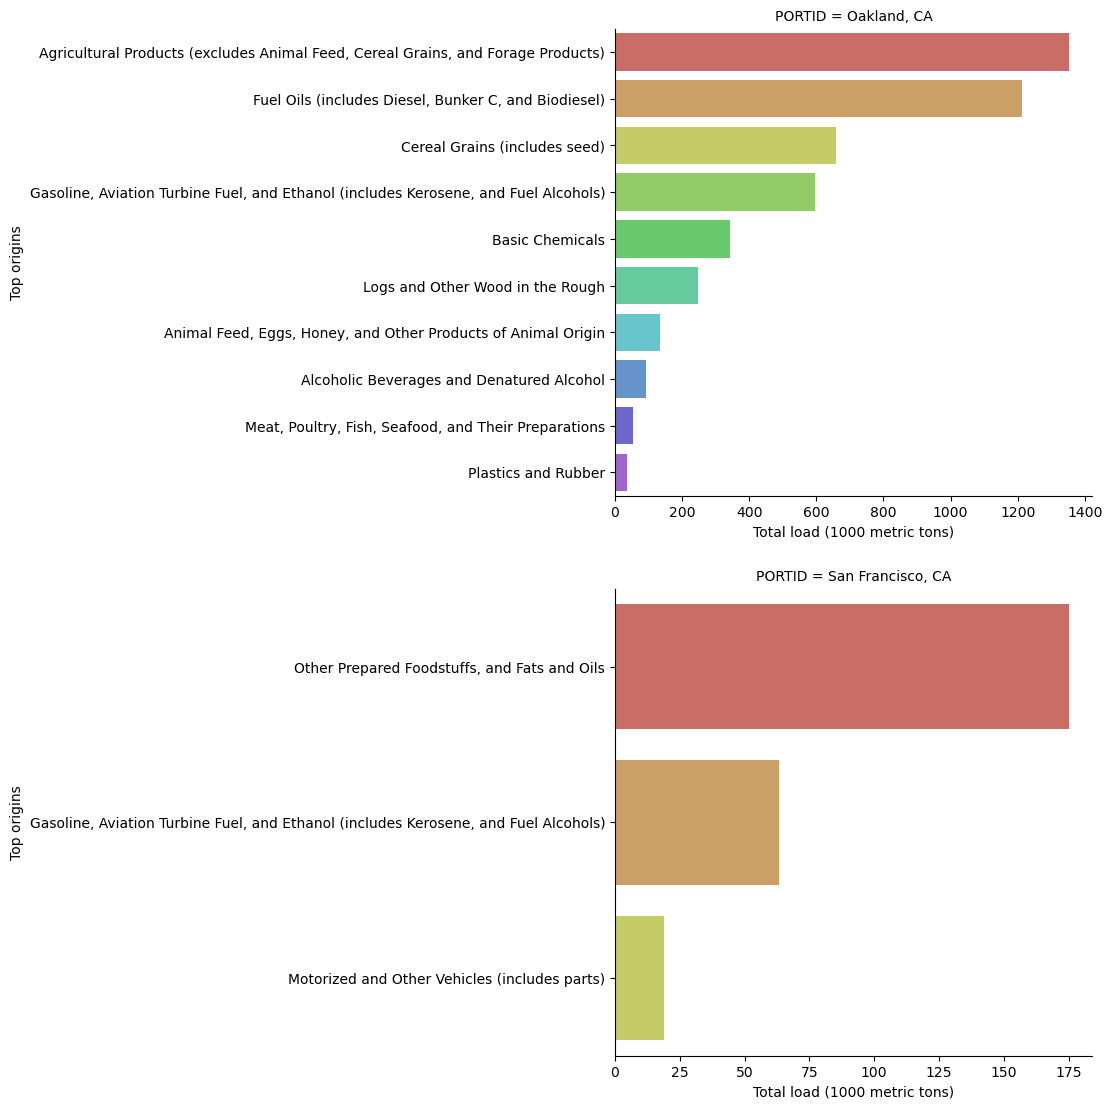

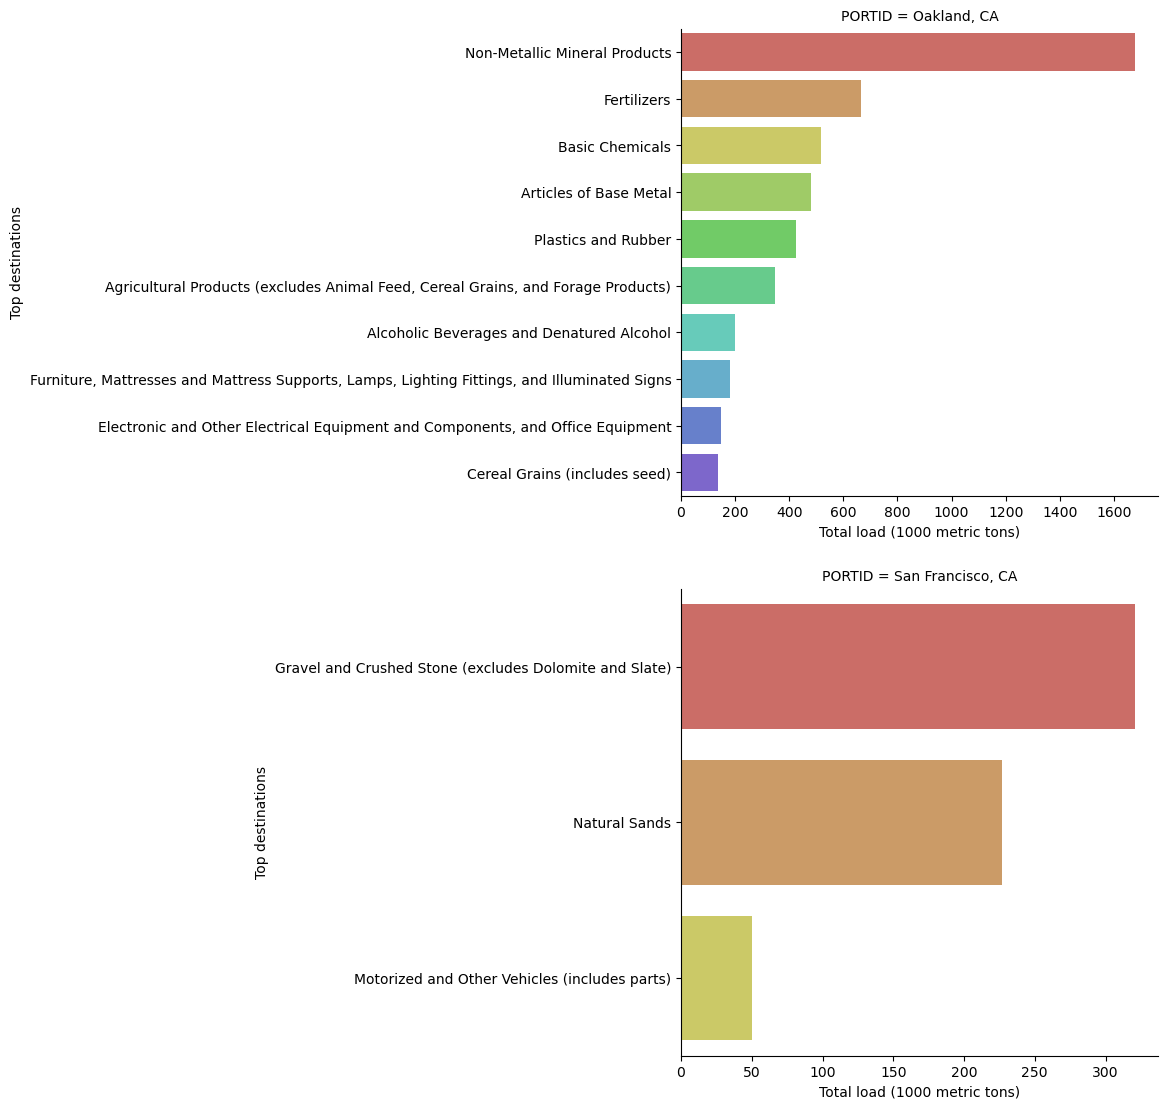

In [30]:
# top import/export commodity
sf_export_truck_sctg = \
sf_export_truck_shipment.groupby(['PORTID', 'Description'])[['total_load']].sum()
sf_export_truck_sctg = sf_export_truck_sctg.reset_index()
sf_export_truck_sctg = \
sf_export_truck_sctg.sort_values(by = 'total_load', ascending = False)

sf_import_truck_sctg = \
sf_import_truck_shipment.groupby(['PORTID', 'Description'])[['total_load']].sum()
sf_import_truck_sctg = sf_import_truck_sctg.reset_index()
sf_import_truck_sctg = \
sf_import_truck_sctg.sort_values(by = 'total_load', ascending = False)

sf_import_truck_sctg.head(5)

sf_export_truck_sctg = sf_export_truck_sctg.groupby('PORTID').head(10)
sf_export_truck_sctg = sf_export_truck_sctg.reset_index()

ax = sns.catplot(kind = 'bar', data = sf_export_truck_sctg,
           y = 'Description', x = 'total_load', row = 'PORTID', sharex = False,
           sharey = False, height=5.5, aspect = 1, palette = 'hls')
ax.set(ylabel ="Top origins")
ax.set(xlabel ="Total load (1000 metric tons)")
plt.subplots_adjust(hspace = 0.2)
plt.savefig(os.path.join(file_path, path_to_plot, 'export_by_port_sctg.png'),
           dpi = 300, bbox_inches = 'tight')
plt.show()

sf_import_truck_sctg = sf_import_truck_sctg.groupby('PORTID').head(10)
sf_import_truck_sctg = sf_import_truck_sctg.reset_index()

ax = sns.catplot(kind = 'bar', data = sf_import_truck_sctg,
           y = 'Description', x = 'total_load', row = 'PORTID', sharex = False,
           sharey = False, height=5.5, aspect = 1, palette = 'hls')
ax.set(ylabel ="Top destinations")
ax.set(xlabel ="Total load (1000 metric tons)")
plt.subplots_adjust(hspace = 0.2)
plt.savefig(os.path.join(file_path, path_to_plot, 'import_by_port_sctg.png'),
           dpi = 300, bbox_inches = 'tight')
plt.show()